In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91945\\Downloads\\avocado.csv\\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)#dropping waste column
df.isna().sum()
#no null entry

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df.drop_duplicates()#no duplicate entry

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.info()#checking dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### For price prediction, extracting day,month,year from Date column and encoding type and region column.

In [6]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
df.drop('Date',axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])

In [9]:
df.describe()
#outliers in Xlarge bags
#type and region are categorical data with 2 and 53 unique values

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,31.000000,12.000000


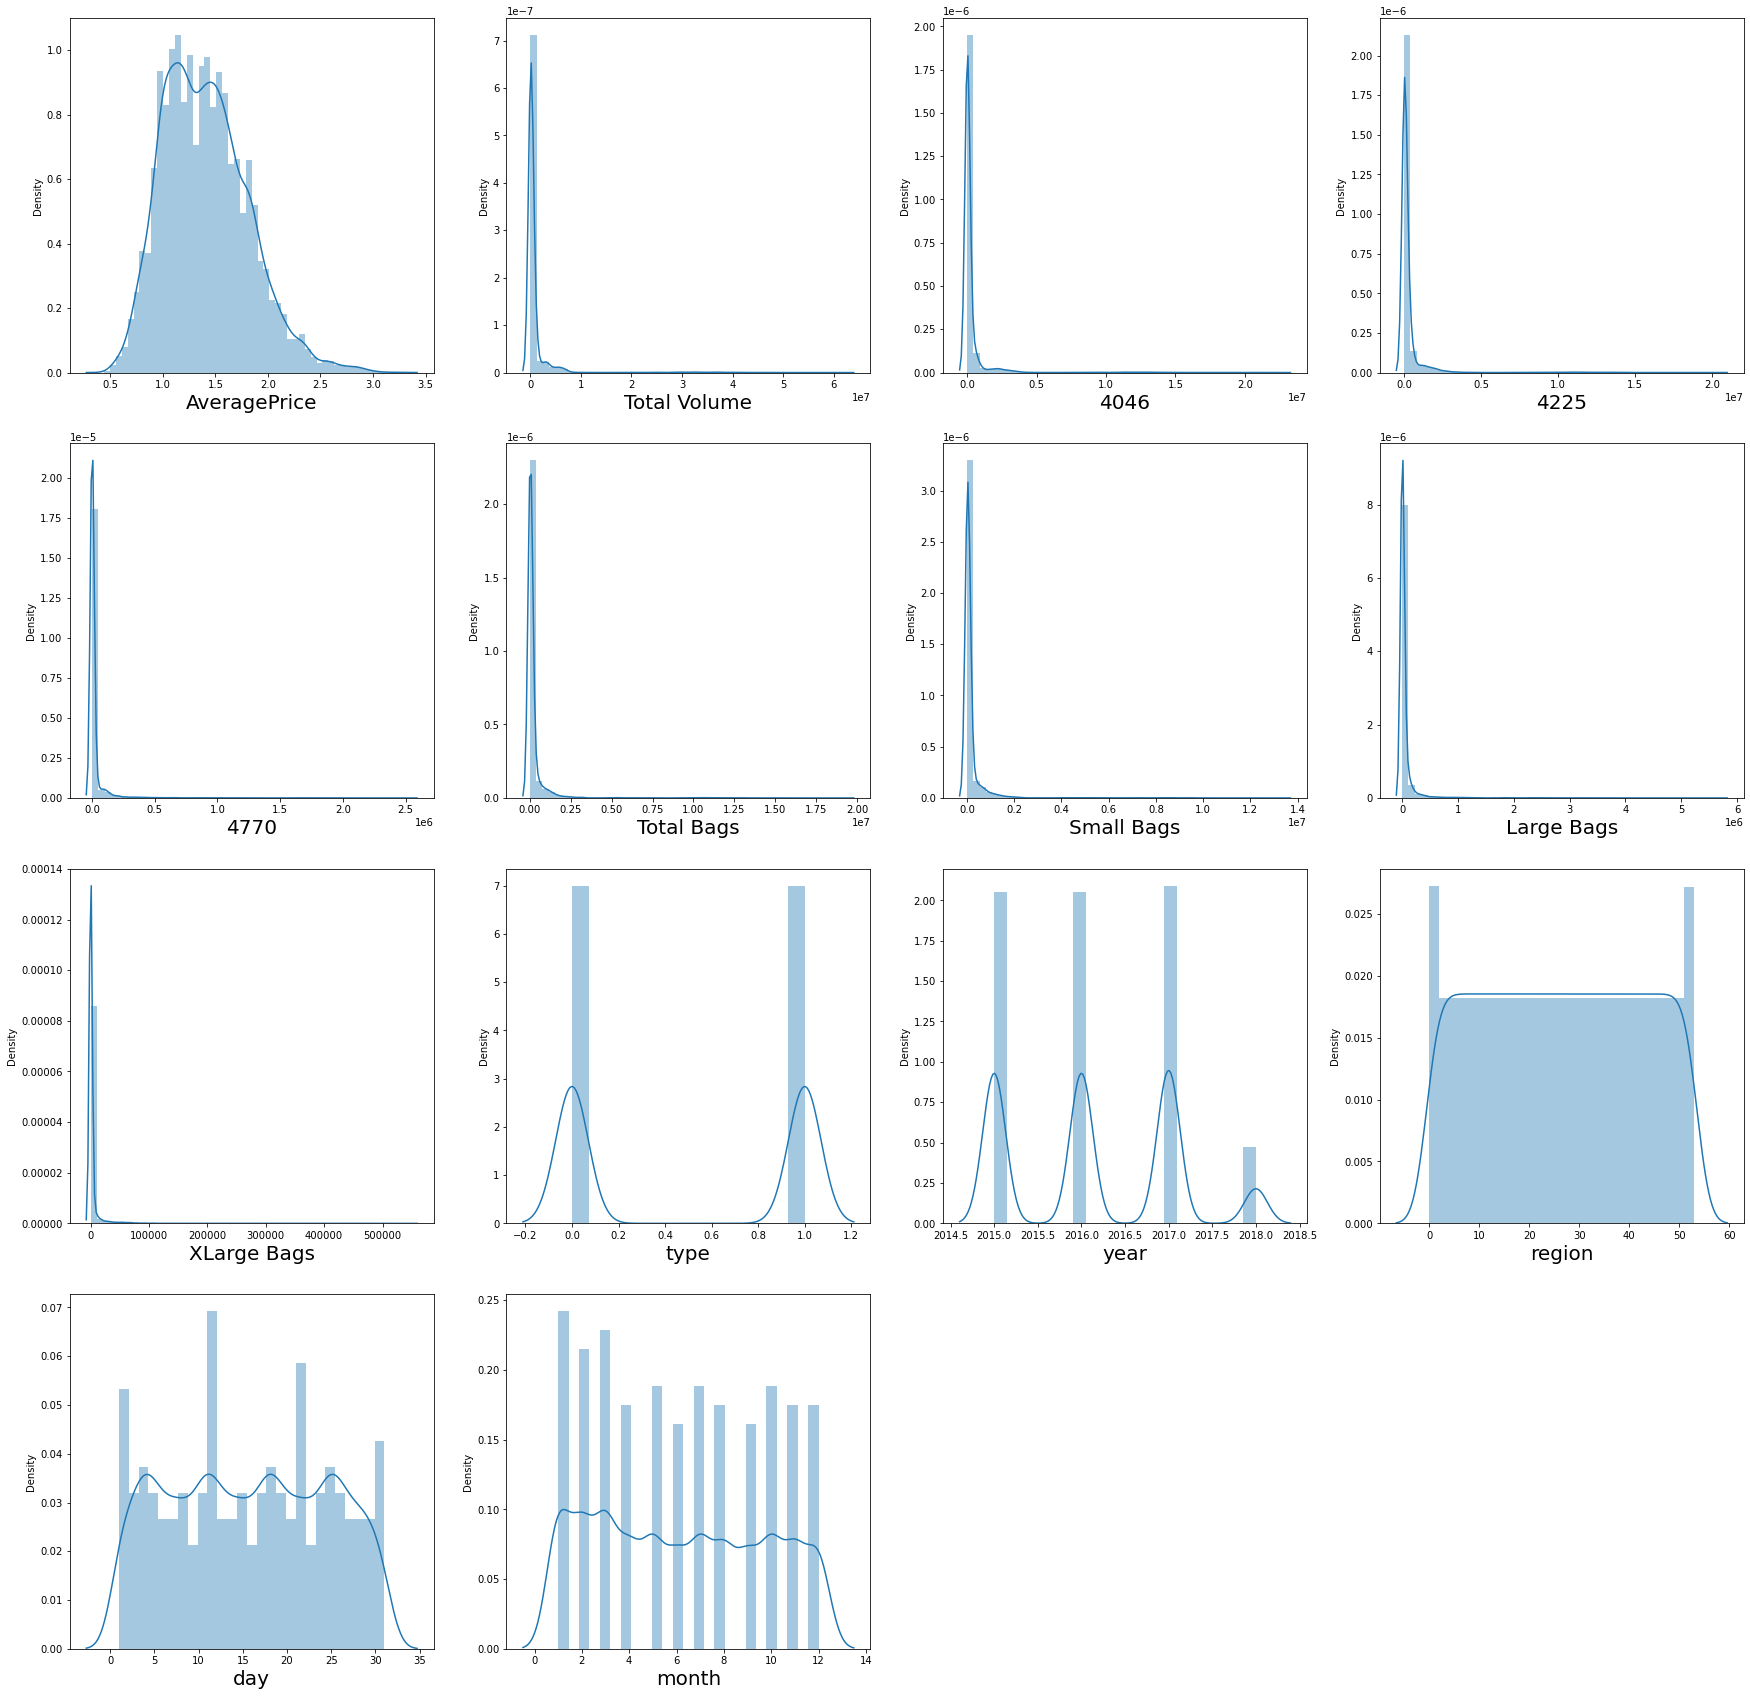

In [10]:
plt.figure(figsize=(30,30),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

average price is target column

total volume,4046,4225,4770,total bags ,small bags, large bags,Xlarge bags hace skewness and outliers.

remaining are categorical features.

### Let's check for Outliers

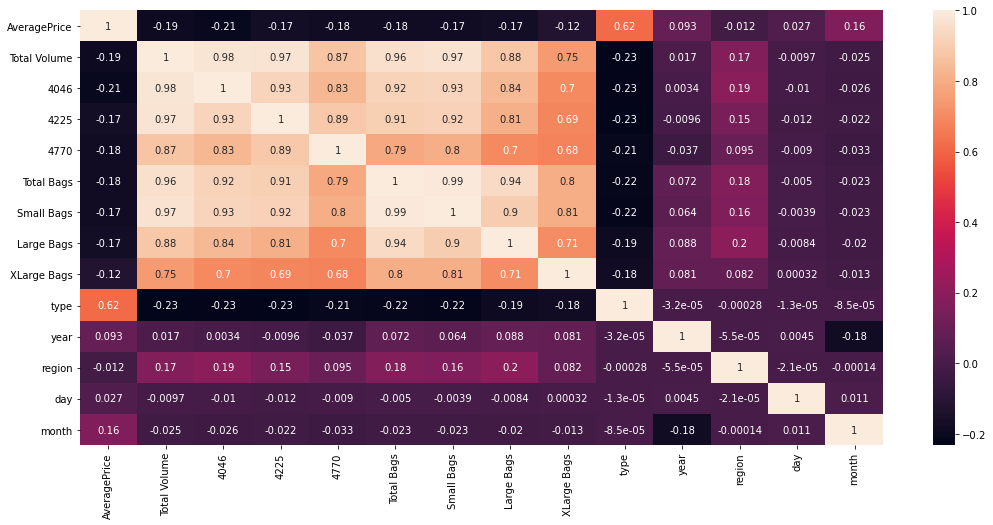

In [11]:
corr=df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(data=corr,annot=True)
plt.show()

4046 and total volume are highly correlated,4225 and total volume,4046 ara highly correalated,

total bags and total volume,4046,4225 are highly correlated

small bags and total volume,4046,4225 are highly correlated

large bags and total bags,small bags are highly correlated

4770 and 4225 and total volume are highly correlated.

we will confirm it, using scatter plot.

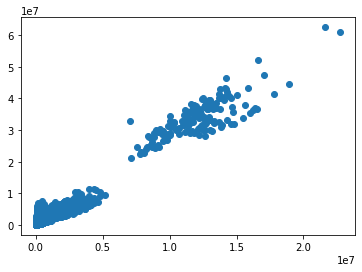

In [12]:
#Let's confirm it
plt.scatter(df['4046'],df['Total Volume'])
plt.show()
#both are positivly correlated

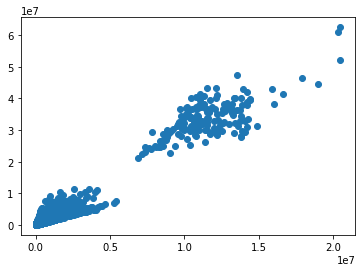

In [13]:
#Let's confirm it
plt.scatter(df['4225'],df['Total Volume'])
plt.show()
#both are positivly correlated

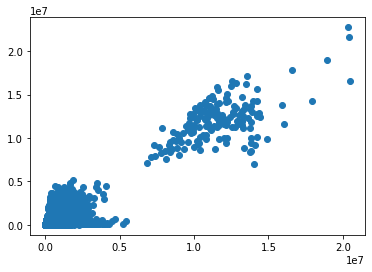

In [14]:
#Let's confirm it
plt.scatter(df['4225'],df['4046'])
plt.show()
#both are positivly correlated

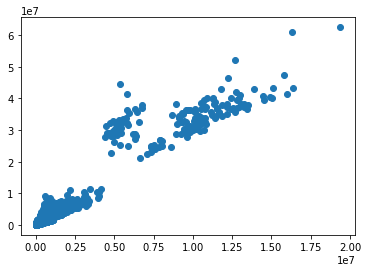

In [15]:
#Let's confirm it
plt.scatter(df['Total Bags'],df['Total Volume'])
plt.show()
#both are positivly correlated

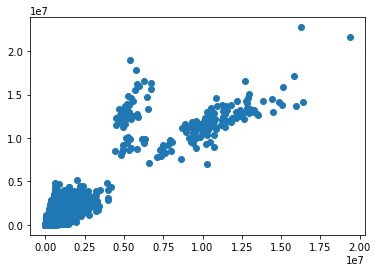

In [16]:
#Let's confirm it
plt.scatter(df['Total Bags'],df['4046'])
plt.show()
#datapoints are scattered

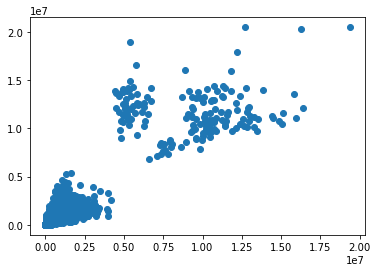

In [17]:
#Let's confirm it
plt.scatter(df['Total Bags'],df['4225'])
plt.show()
#graph is scatterd

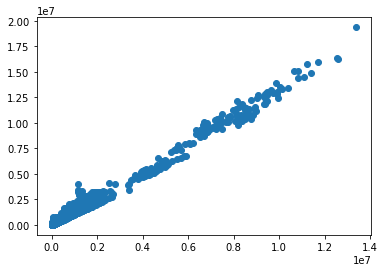

In [18]:
#Let's confirm it
plt.scatter(df['Small Bags'],df['Total Bags'])
plt.show()
#both are positivly correlated

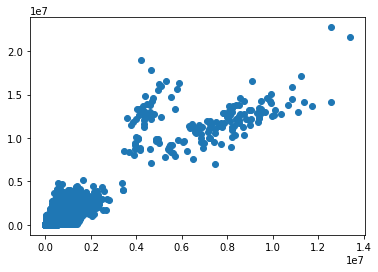

In [19]:
#Let's confirm it
plt.scatter(df['Small Bags'],df['4046'])
plt.show()
#graph is scattered

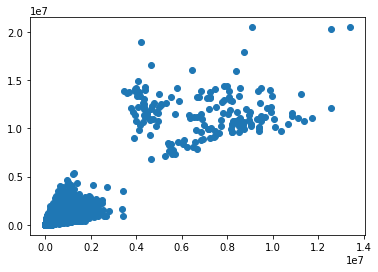

In [20]:
#Let's confirm it
plt.scatter(df['Small Bags'],df['4225'])
plt.show()
#graph is scattered

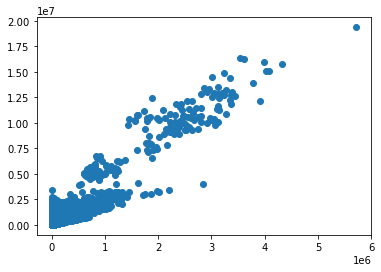

In [21]:
#Let's confirm it
plt.scatter(df['Large Bags'],df['Total Bags'])
plt.show()
#both are positivly correlated

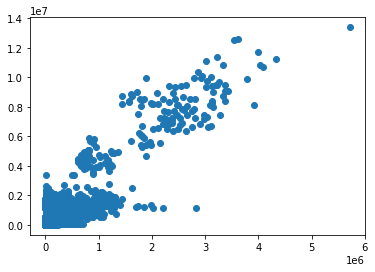

In [22]:
#Let's confirm it
plt.scatter(df['Large Bags'],df['Small Bags'])
plt.show()
#both are positivly correlated

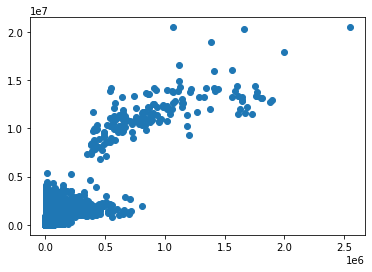

In [23]:
#Let's confirm it
plt.scatter(df['4770'],df['4225'])
plt.show()
#graph is scattered

Day , month,year have less impact on price column, let's go for coorwith.

Let's go for select k best feature selection and see wheather we can remove total volume

In [24]:
#checking correlation of features and target using corrwith
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice)

Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
day             0.027386
month           0.162409
dtype: float64

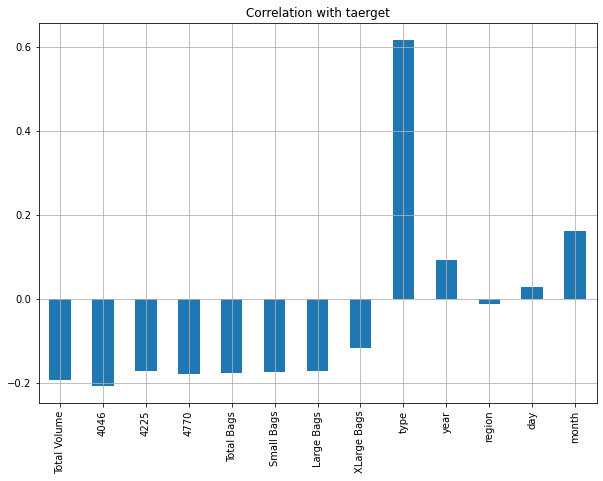

In [25]:
#visualising the correlation 
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',figsize=(10,7),title='Correlation with taerget',grid=True)
plt.show()

let's remove small bags,region,day

as small bags and total bags are similar

other two have very less impact on aaverage price

In [26]:
df1=df.copy()
df1.drop(columns=['Small Bags','region','day'],axis=1,inplace=True)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,1


### Let's select 99.7% data using z score and remeove outliers

In [27]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df))
df_new = df1[(z<3).all(axis = 1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,1,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,1,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,1,2018,1


### let's check for skewness

In [28]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
month           0.107408
dtype: float64

type , year, month have categorical data

average price is target column

all remaining have skewness

let's remove using yeo-johnson

In [29]:
X=df_new.drop('AveragePrice',axis=1)
y=df_new.AveragePrice

In [30]:
#Removing skewness using yeo-johnson method



from sklearn.preprocessing import power_transform
X_skew=power_transform(X,method='yeo-johnson')

In [31]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=342)

### Linear_regression

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.20300440662081456
0.06613700543891295
0.257171159811735


In [34]:
#adjusted r2_score train _data
print("Train_score:",lr.score(X_train,y_train))
#r2_score for test _data
print("Test_score:",lr.score(X_test,y_test))
#Model is neither overfit nor underfit

Train_score: 0.54530275571984
Test_score: 0.5512722703641304


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 0.25973393841712467


### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))

Mean_squared_error: 0.14290629394843157
train_score: 0.9800258793023156
test_score: 0.8614389727713294


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(rf, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 0.13698073840928987


In [38]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 0.14719945569976867
train_score: 0.9099698398713513
test_score: 0.8529886758570707


In [39]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 0.1393701961430772


In [40]:
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
y_pred=model_ABR.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 0.2543472726504576
train_score: 0.9099698398713513
test_score: 0.8529886758570707


In [41]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model_ABR, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 0.25799375832152466


### Random Forest Regressor is giving best results, let's tune parameters

In [42]:
#parameteres in use now
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestRegressor(n_estimators= 500,#initialising params
 min_samples_split=2,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=50,
 bootstrap=False)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))

### Random forest regressor is best model with least RMSE to predict Average Price.

In [ ]:
#saving the model in local system
import pickle
filename='finalized_baseball_model.pickle'
pickle.dump(rf,open(filename,'wb'))

## Classfication of Region column using various Classifiers.

In [91]:
#checking correlation of features and target using corrwith
df.drop('region',axis=1).corrwith(df.region)

AveragePrice   -0.011716
Total Volume    0.174176
4046            0.192073
4225            0.145726
4770            0.095252
Total Bags      0.175256
Small Bags      0.164702
Large Bags      0.198768
XLarge Bags     0.082281
type           -0.000280
year           -0.000055
day            -0.000021
month          -0.000144
dtype: float64

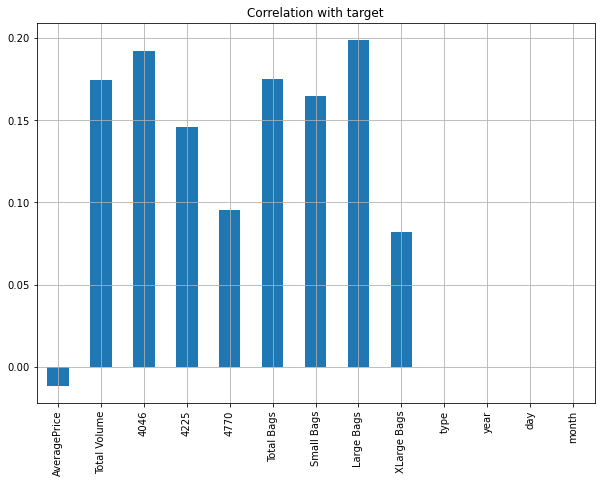

In [92]:
#visualising the correlation 
df.drop('region',axis=1).corrwith(df.region).plot(kind='bar',figsize=(10,7),title='Correlation with target',grid=True)
plt.show()

### Let's drop Average price,type,year,dat,month as they contribute the least.

In [93]:
df2=df.drop(columns=['AveragePrice','type','year','day','month'],axis=1)

In [94]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df))
df_n = df2[(z<3).all(axis = 1)]
df_n

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,53


In [95]:
#Let's check for skewness
df_n.skew()#threshold=+_.70
#let's remove it using yeo_johnson

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
region          0.012798
dtype: float64

In [96]:
X=df_n.drop('region',axis=1)
y=df_n.region

In [97]:
#Removing skewness using yeo-johnson method



from sklearn.preprocessing import power_transform
X_skew=power_transform(X,method='yeo-johnson')


In [98]:
#Let's Normalise data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_skew)



In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)

### Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_pred,y_test)

0.7454682779456193

In [101]:
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=dt.predict(X_train)
print('Training score:',dt.score(X_train,y_train))
print('Testing score:',dt.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

[[65  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  3]
 [ 0  0 90 ...  0  0  3]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  0  0 ...  0  0 77]] 

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        86
           1       0.65      0.63      0.64       101
           2       0.90      0.80      0.85       112
           3       0.72      0.74      0.73        85
           4       0.77      0.76      0.76        90
           5       0.63      0.62      0.63       101
           6       0.85      0.92      0.88        78
           7       0.76      0.78      0.77       101
           8       0.88      0.85      0.87       106
           9       0.68      0.72      0.70        87
          10       0.68      0.64      0.66       108
          11       0.89      0.88      0.88       112
          12       0.87      0.78      0.82        99
          13       0.78      0.75      0.77       109
          14       0.75      0.

### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1)

rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=rf.predict(X_train)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.8489425981873112
[[ 73   0   0 ...   0   0   0]
 [  0  75   0 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ...  43   0   0]
 [  0   0   0 ...   1  71   0]
 [  0   0   0 ...   0   0  88]] 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        86
           1       0.73      0.74      0.74       101
           2       0.92      0.97      0.94       112
           3       0.85      0.81      0.83        85
           4       0.89      0.83      0.86        90
           5       0.81      0.70      0.75       101
           6       0.92      1.00      0.96        78
           7       0.90      0.89      0.90       101
           8       0.97      0.92      0.94       106
           9       0.81      0.85      0.83        87
          10       0.78      0.80      0.79       108
          11       0.95      0.94      0.94       112
          12       0.94      0.88      0.91        99
          13       0.84      0

### Support Vector Classifier

In [103]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
train_pred=svc.predict(X_train)
print("svc_training_score:",svc.score(X_train,y_train))
print("svc_testing_score:",svc.score(X_test,y_test))
pred_svc = svc.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

svc_training_score: 0.7459328207203562
svc_testing_score: 0.7194108761329305
accuracy_score : 0.7194108761329305
[[78  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 96 ...  1  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  1  1 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.63      0.91      0.74        86
           1       0.54      0.55      0.55       101
           2       0.89      0.86      0.87       112
           3       0.68      0.68      0.68        85
           4       0.78      0.67      0.72        90
           5       0.83      0.50      0.62       101
           6       0.88      0.94      0.91        78
           7       0.79      0.73      0.76       101
           8       0.88      0.92      0.90       106
           9       0.64      0.79      0.71        87
          10       0.55      0.68      0.61       108
          11       0.85      0.83      0.84       112
          12       0.87     

### Ada Boost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)


print(accuracy)
cnf=confusion_matrix(y_test,y_pred)
print(cnf,'\n')
print(classification_report(y_test,y_pred))


X_pred=ada.predict(X_train)
print('Training score:',ada.score(X_train,y_train))
print('Testing score:',ada.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ada,X_scaled,y,cv=5)
print('Cross_validation_score:',cvs.mean())

0.05173716012084592
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       112
           3       0.00      0.00      0.00        85
           4       0.09      0.06      0.07        90
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       101
           8       0.00      0.00      0.00       106
           9       0.03      1.00      0.05        87
          10       0.00      0.00      0.00       108
          11       0.10      0.51      0.16       112
          12       0.00      0.00      0.00        99
          13       0.00      0.00      0.00       109
          14       0.00      0.00      0.00    

### Random Forest Classifier is giving best cv score, accuracy score and testing score

In [69]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
#let's tune parameter with grid search cv
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=343)
rf=RandomForestClassifier()
params={'n_estimators':[50,100,150,200,250,300],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[2,5,10],
       'min_samples_leaf':[2,3,5,6]}
grd=GridSearchCV(rf,param_grid=params)
grd.fit(X_train,y_train)
clf=grd.best_estimator_   #reinstantiating with best params

In [76]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
rf=RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       n_estimators=250)
rf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cnf=confusion_matrix(y_test,y_pred)
print(cnf)
print(accuracy_score(y_test,y_pred))

[[ 73   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  43   0   0]
 [  0   0   0 ...   1  70   0]
 [  0   1   0 ...   0   0  87]]
0.8485649546827795


In [ ]:
#saving the model in local system
import pickle
filename='finalized_avacado.pickle'
pickle.dump(rf,open(filename,'wb'))

### End